In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
PATH = "C:/Users/Admin/Documents/Untitled Folder"

In [3]:
df = pd.read_csv(PATH + "/all.csv")


In [4]:
file1 = open(PATH + '/NYSE.txt',"r") 
NYSE_stocks = []
for line in file1:
    ln = line.split('\t')
    ln[1] = ln[1].split('\n')[0]
    NYSE_stocks.append(ln)
file1.close()

In [5]:
NYSE_stocks = NYSE_stocks[1:-1]

In [6]:
NYSE_indexes = []
for stock in NYSE_stocks:
    index = stock[0]
    NYSE_indexes.append(index)
print(NYSE_indexes)

['A', 'AA', 'AAC', 'AAN', 'AAP', 'AAT', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABR-A', 'ABR-B', 'ABR-C', 'ABT', 'AC', 'ACA', 'ACB', 'ACC', 'ACCO', 'ACH', 'ACM', 'ACN', 'ACP', 'ACRE', 'ACV', 'ADC', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AEB', 'AEE', 'AEG', 'AEH', 'AEL', 'AEM', 'AEO', 'AEP', 'AEP-B', 'AER', 'AES', 'AFB', 'AFC', 'AFG', 'AFGB', 'AFGE', 'AFGH', 'AFI', 'AFL', 'AFT', 'AG', 'AGCO', 'AGD', 'AGI', 'AGM', 'AGM-A', 'AGM-C', 'AGM-D', 'AGM.A', 'AGN', 'AGO', 'AGO-B', 'AGO-E', 'AGO-F', 'AGR', 'AGRO', 'AGS', 'AGX', 'AHC', 'AHH', 'AHH-A', 'AHL-C', 'AHL-D', 'AHL-E', 'AHT', 'AHT-D', 'AHT-F', 'AHT-G', 'AHT-H', 'AHT-I', 'AI', 'AI-B', 'AI-C', 'AIC', 'AIF', 'AIG', 'AIG-A', 'AIG.W', 'AIN', 'AIR', 'AIT', 'AIV', 'AIW', 'AIY', 'AIZ', 'AIZP', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKO.A', 'AKO.B', 'AKR', 'AKS', 'AL', 'AL-A', 'ALB', 'ALC', 'ALE', 'ALEX', 'ALG', 'ALK', 'ALL', 'ALL-A', 'ALL-B', 'ALL-D', 'ALL-E', 'ALL-F', 'ALL-G', 'ALL-H', 'ALL-Y', 'ALLE', 'ALLY', 'ALP-Q', 'ALSN', 'AL

<h1> Задание №2</h1>

In [63]:
def count_daily_profit(day):
    return np.log(day[0] / day[1])

def get_log_profits(prices, columns, ticker):
    prices_ = zip(prices[0:-1], prices[1:])
    prices_ = map(count_daily_profit, prices_)
    res = [ticker]
    res.extend(prices_)
    while(len(res) < len(columns)):
        res.append(res[-1])
#     stock_profits = np.zeros(len(columns))
#     stock_profits.append(ticker)
    return pd.Series(res, index=columns)

<h3> Подсчет дневных логарифмических доходностей </h3>

In [74]:
log_profits = pd.DataFrame(columns=np.unique(df.date))

In [75]:
log_profits.insert(column = 'ticker', loc = 0, value = 0)

In [76]:
no_data_count = 0
for stock_index in NYSE_indexes:
    stock_data = df.loc[df['ticker'] == stock_index]
#     print(stock_data)
    if stock_data.shape[0] == 0:
        no_data_count = no_data_count + 1
        continue
    stock_profits = get_log_profits(np.array(stock_data['close']), log_profits.columns, stock_index)
#     print(stock_profits.shape)
    # print(stock_profits)
    log_profits = log_profits.append(stock_profits, ignore_index=True)

In [77]:
log_profits = log_profits.set_index('ticker')
log_profits = log_profits.transpose()
log_profits = log_profits.astype(float)

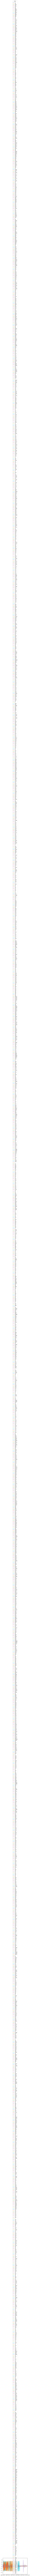

In [78]:
log_profits.plot()

<h3> Подсчет среднего и стандартного отклонения дневных логорифмических доходностей акций. Построение карты активов </h3>

<class 'pandas.core.series.Series'>


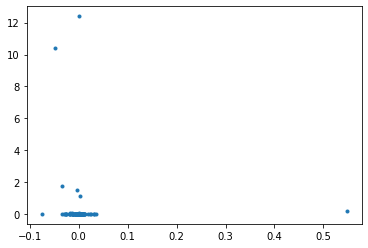

In [80]:
means = log_profits.mean()
vars = log_profits.var()
print(type(vars))
plt.xlabel = 'mean'
plt.ylabel = 'var'
plt.plot(means, vars, '.')

<h1> Задание 6 <h1>

In [174]:
chosen_indexes = np.random.choice(log_profits.columns, 50)

Лучший набор акций:
['HI', 'PLOW', 'VBF', 'RVT', 'AMN', 'AGS', 'MFV', 'VNCE', 'CXH',
       'UAA', 'HLI', 'SE', 'SDT', 'BIP', 'OXY', 'AGI', 'IGA', 'JWN',
       'ANH', 'CABO', 'ARI', 'KDMN', 'OR', 'SB', 'ESTE', 'RLH', 'TEX',
       'PCN', 'DLX', 'DVN', 'MCX', 'ECCA', 'PRA', 'NVS', 'PHI', 'CBZ',
       'DMO', 'SKT', 'MUI', 'BXC', 'UZA', 'GRA', 'TDW', 'GER', 'DRI',
       'APRN', 'GMS', 'APH', 'CNC', 'RELX']

In [175]:
chosen_log_profits = log_profits[chosen_indexes]

In [176]:
annual_profits = chosen_log_profits.sum(axis=0)
cov_matrix = chosen_log_profits.cov()

In [234]:
from scipy.special import softmax

In [240]:
def short_allow_weights(arr, size):
    n_samples = len(arr)
    sample = np.random.uniform(0, 1, n_samples)
    sample *= 2
    sample -= 1
    return [sample]

In [180]:
def get_portfel(chosen_log_profits, cov_matrix, annual_profits, weights_function):
    num_ports = 100000
    n_stocks = chosen_log_profits.shape[1]
    all_weights = np.zeros((num_ports, n_stocks))
    ret_arr = np.zeros(num_ports)
    vol_arr = np.zeros(num_ports)
    sharpe_arr = np.zeros(num_ports)

    counter = 0
    for x in range(num_ports):
        # Weights in [-1; 1]
        weights = weights_function(np.ones(n_stocks)*1000.,size=1)[0]
#         print(weights)
    #     weight = np.ones(50) * 0.02
    #     weights =  weights * 2 - 1

        # Save weights
        all_weights[x,:] = weights

        # Expected return
        ret_arr[x] = np.sum( (annual_profits * weights) )

    #     # Expected volatility
        vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    #     # Sharpe Ratio
        sharpe_arr[x] = ret_arr[x]/vol_arr[x]
        counter = counter + 1
        if ((counter / 100) == 0):
            clear_output()
            print(counter, '/', num_ports)
    return (ret_arr, vol_arr, all_weights)

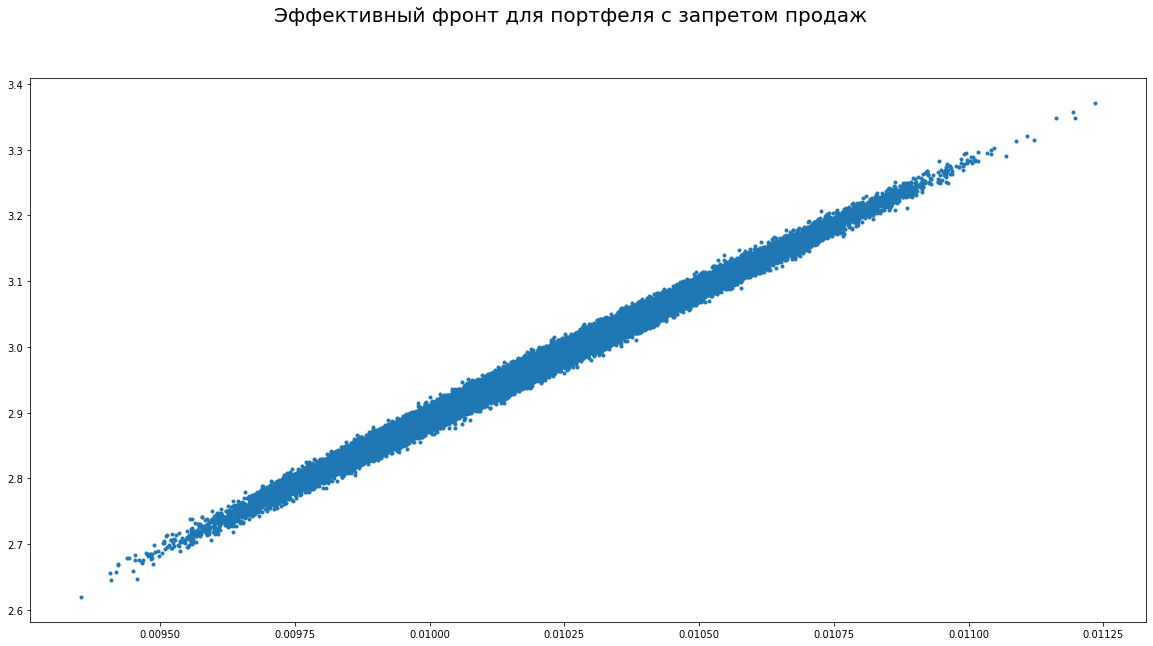

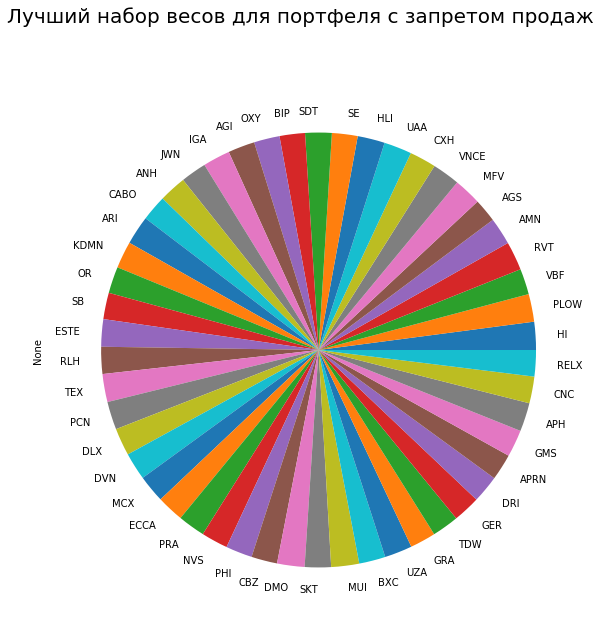

In [226]:
ret_arr, vol_arr, all_weights = get_portfel(chosen_log_profits,cov_matrix, annual_profits, np.random.dirichlet)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Эффективный фронт для портфеля с запретом продаж', fontsize=20)
plt.plot(vol_arr, ret_arr, '.')
# plt.xlabel('Доходность портфеля')
# plt.ylabel('Риск')
plt.show()
fig.savefig('eff_front.png')

best_portfel = np.argmin(vol_arr)
fig = plt.figure(figsize=(20,10))
pd.Series(all_weights[best_portfel], index=chosen_indexes).plot.pie()
# fig = pie.get_figure()
fig.suptitle('Лучший набор весов для портфеля с запретом продаж', fontsize=20)
plt.show()
fig.savefig('pie.png')

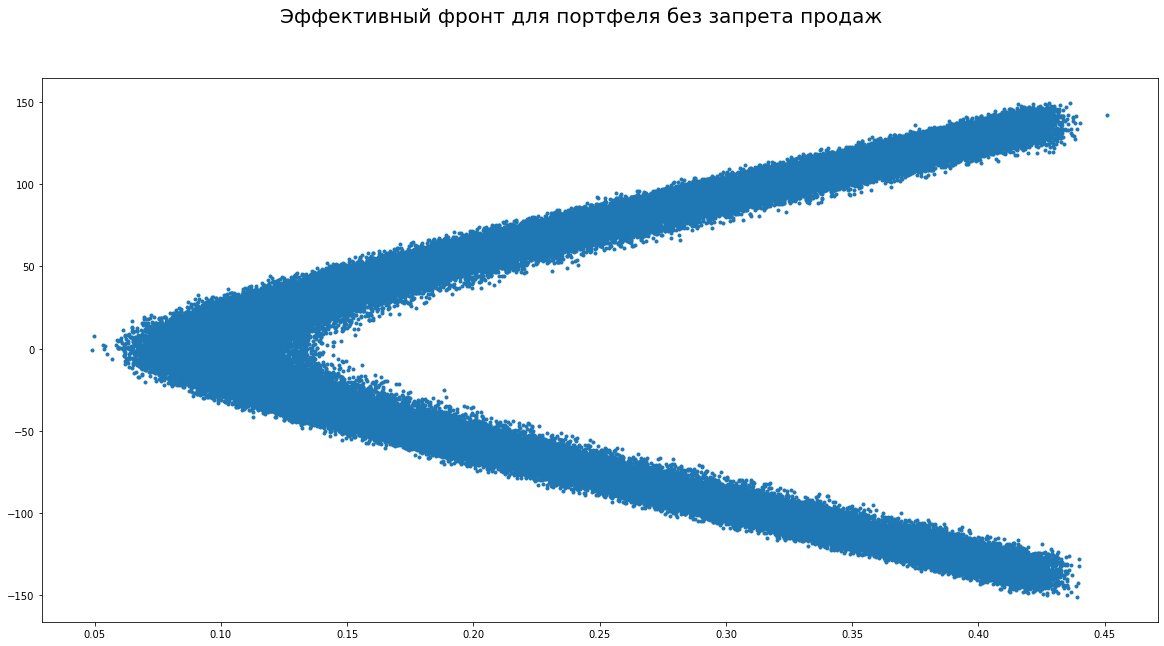

In [243]:
ret_arr, vol_arr, all_weights = get_portfel(chosen_log_profits,cov_matrix, annual_profits, short_allow_weights)
vol_arr = np.clip(vol_arr, -1, 200)
ret_arr = np.clip(ret_arr, -200, 200)
fig = plt.figure(figsize=(20,10))
fig.suptitle('Эффективный фронт для портфеля без запрета продаж', fontsize=20)
plt.plot(vol_arr, ret_arr, '.')
# plt.xlabel('Доходность портфеля')
# plt.ylabel('Риск')
plt.show()
fig.savefig('eff_front_all.png')

# best_portfel = np.argmin(vol_arr)
# fig = plt.figure(figsize=(20,10))
# pd.Series(all_weights[best_portfel], index=chosen_indexes).plot.pie()
# # fig = pie.get_figure()
# fig.suptitle('Лучший набор весов для портфеля без запрета продаж', fontsize=20)
# plt.show()
# fig.savefig('pie_all.png')

<h3> Сравнение эффективныx фронтов: </h3>

Эффективный фронт с запретом коротких продаж отличается от эффективного фронта с разрешенными короткими продажами.
В случае с запретом, все доходности оказались положительными, а риски небольшими.
Если же короткие продажи не запрещены, то риски повышаются. 
Однако, вместе с рисками повышается и доходность.
Таким образом, можно сделать вывод, что портфели с запретом коротких продаж подходят для инвесторов, которые хотят сохранить свои деньги, а не преумножить. А портфели с разрешенными короткими продажами больше подходят людям, которые хотят заработать. Однако, тут стоит брать во внимание риски.